Step 2: Using the same Shakespeare play from your Week 6 Assignment:

- Tokenize the words, remove stopwords, stem or lemmatize the words, and calculate the word frequencies
- For the word frequencies, calculate the mean, median, mode, and trimmed mean.
    - For the trimmed mean, you can choose what to trim, but comment on the number used for trimming.
- Plot a histogram of the word frequency data and comment on the relative locations of the mean, median, mode, and trimmed mean
- Calculate the standard deviation and the interquartile range (the difference of the 75% and 25% quantile)
    - Comment as well on how they compare to each other and to the histogram plot.

In [134]:
#url https://www.gutenberg.org/files/1112/1112.txt
import nltk
import requests
import pandas as pd
from bs4 import BeautifulSoup
response = requests.get('https://www.gutenberg.org/files/1112/1112.txt')
_string = response.text
_string

'The Project Gutenberg EBook of Romeo and Juliet, by William Shakespeare\r\n\r\n\r\n*******************************************************************\r\nTHIS EBOOK WAS ONE OF PROJECT GUTENBERG\'S EARLY FILES PRODUCED AT A\r\nTIME WHEN PROOFING METHODS AND TOOLS WERE NOT WELL DEVELOPED. THERE\r\nIS AN IMPROVED EDITION OF THIS TITLE WHICH MAY BE VIEWED AS EBOOK\r\n(#1513) at https://www.gutenberg.org/ebooks/1513\r\n*******************************************************************\r\n\r\n\r\nThis eBook is for the use of anyone anywhere at no cost and with\r\nalmost no restrictions whatsoever.  You may copy it, give it away or\r\nre-use it under the terms of the Project Gutenberg License included\r\nwith this eBook or online at www.gutenberg.org/license\r\n\r\n\r\nTitle: Romeo and Juliet\r\n\r\nAuthor: William Shakespeare\r\n\r\nPosting Date: May 25, 2012 [EBook #1112]\r\nRelease Date: November, 1997  [Etext #1112]\r\n\r\nLanguage: English\r\n\r\nCharacter set encoding: ASCII\r\n\r\n**

In [63]:
from nltk.tokenize import word_tokenize, sent_tokenize

sent = sent_tokenize(_string)
print(sent)

words = []
for s in sent:
    for w in word_tokenize(s):
        words.append(w)
        
print(words)

["The Project Gutenberg EBook of Romeo and Juliet, by William Shakespeare\r\n\r\n\r\n*******************************************************************\r\nTHIS EBOOK WAS ONE OF PROJECT GUTENBERG'S EARLY FILES PRODUCED AT A\r\nTIME WHEN PROOFING METHODS AND TOOLS WERE NOT WELL DEVELOPED.", 'THERE\r\nIS AN IMPROVED EDITION OF THIS TITLE WHICH MAY BE VIEWED AS EBOOK\r\n(#1513) at https://www.gutenberg.org/ebooks/1513\r\n*******************************************************************\r\n\r\n\r\nThis eBook is for the use of anyone anywhere at no cost and with\r\nalmost no restrictions whatsoever.', 'You may copy it, give it away or\r\nre-use it under the terms of the Project Gutenberg License included\r\nwith this eBook or online at www.gutenberg.org/license\r\n\r\n\r\nTitle: Romeo and Juliet\r\n\r\nAuthor: William Shakespeare\r\n\r\nPosting Date: May 25, 2012 [EBook #1112]\r\nRelease Date: November, 1997  [Etext #1112]\r\n\r\nLanguage: English\r\n\r\nCharacter set encoding: ASCII\r\n\

In [65]:
from nltk.corpus import stopwords
from string import punctuation
nltk.download('stopwords')
myStopWords = list(punctuation) + stopwords.words('english')

wordsNoStop = []
for i in words:
    if i not in myStopWords:
        wordsNoStop.append(i)
#print(words)
print(wordsNoStop)


['The', 'Project', 'Gutenberg', 'EBook', 'Romeo', 'Juliet', 'William', 'Shakespeare', 'THIS', 'EBOOK', 'WAS', 'ONE', 'OF', 'PROJECT', 'GUTENBERG', "'S", 'EARLY', 'FILES', 'PRODUCED', 'AT', 'A', 'TIME', 'WHEN', 'PROOFING', 'METHODS', 'AND', 'TOOLS', 'WERE', 'NOT', 'WELL', 'DEVELOPED', 'THERE', 'IS', 'AN', 'IMPROVED', 'EDITION', 'OF', 'THIS', 'TITLE', 'WHICH', 'MAY', 'BE', 'VIEWED', 'AS', 'EBOOK', '1513', 'https', '//www.gutenberg.org/ebooks/1513', 'This', 'eBook', 'use', 'anyone', 'anywhere', 'cost', 'almost', 'restrictions', 'whatsoever', 'You', 'may', 'copy', 'give', 'away', 're-use', 'terms', 'Project', 'Gutenberg', 'License', 'included', 'eBook', 'online', 'www.gutenberg.org/license', 'Title', 'Romeo', 'Juliet', 'Author', 'William', 'Shakespeare', 'Posting', 'Date', 'May', '25', '2012', 'EBook', '1112', 'Release', 'Date', 'November', '1997', 'Etext', '1112', 'Language', 'English', 'Character', 'set', 'encoding', 'ASCII', 'START', 'OF', 'THIS', 'PROJECT', 'GUTENBERG', 'EBOOK', 'ROMEO

[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [66]:
from nltk.collocations import *
from nltk.probability import FreqDist
freq = FreqDist(wordsNoStop)

#dic = {'word':0, 'freq':0 }

for i in sorted(freq, key=freq.get, reverse=True)[:20]:
    print(i,freq[i])


I 649
's 293
thou 236
And 229
'd 224
Rom 163
Romeo 155
O 149
thy 145
love 139
thee 135
Nurse 118
Jul 117
What 106
shall 96
The 90
'll 90
To 86
Project 84
But 83


In [67]:
dic = {'word': freq.keys(), 'count': freq.values()}
dic

{'word': dict_keys(['The', 'Project', 'Gutenberg', 'EBook', 'Romeo', 'Juliet', 'William', 'Shakespeare', 'THIS', 'EBOOK', 'WAS', 'ONE', 'OF', 'PROJECT', 'GUTENBERG', "'S", 'EARLY', 'FILES', 'PRODUCED', 'AT', 'A', 'TIME', 'WHEN', 'PROOFING', 'METHODS', 'AND', 'TOOLS', 'WERE', 'NOT', 'WELL', 'DEVELOPED', 'THERE', 'IS', 'AN', 'IMPROVED', 'EDITION', 'TITLE', 'WHICH', 'MAY', 'BE', 'VIEWED', 'AS', '1513', 'https', '//www.gutenberg.org/ebooks/1513', 'This', 'eBook', 'use', 'anyone', 'anywhere', 'cost', 'almost', 'restrictions', 'whatsoever', 'You', 'may', 'copy', 'give', 'away', 're-use', 'terms', 'License', 'included', 'online', 'www.gutenberg.org/license', 'Title', 'Author', 'Posting', 'Date', 'May', '25', '2012', '1112', 'Release', 'November', '1997', 'Etext', 'Language', 'English', 'Character', 'set', 'encoding', 'ASCII', 'START', 'ROMEO', 'JULIET', 'proud', 'cooperate', 'World', 'Library', 'presentation', 'Complete', 'Works', 'reading', 'education', 'entertainment', 'HOWEVER', 'NEITHER',

In [80]:
df = pd.DataFrame(dic)
print('mean = '+ str(df['count'].mean()))
print('median = ' + str(df['count'].median()))
print('mode = ' + str(df['count'].mode()))

mean = 4.058052434456929
median = 1.0
mode = 0    1
dtype: int64


In [84]:
#trimming mean
df2 = df.sort_values(by='count',ignore_index=True).copy()
df2.loc[int(0.1*1005):int(0.9*1005),'count'].mean()
#trimming from 10% to 90%

1.0

<AxesSubplot:ylabel='Frequency'>

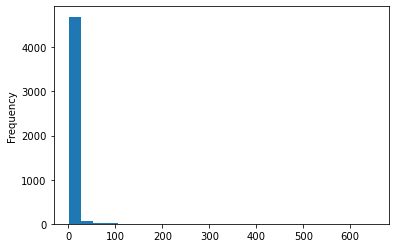

In [86]:
df['count'].plot(kind='hist', bins = 25)
#the range seems to be small and is especially exemplified through the histogram, and explains why the mean, median, 
#and mode aren't too far from eachother 
#trimmed mean seems to be more representative of the average word freqency


In [87]:
df['count'].std()

14.910309748952765

In [88]:
df['count'].quantile(0.75)-df['count'].quantile(0.25)
#interquartile range

2.0

In [ ]:
#looking at the histogram, the interquartile range seems representative of the data, however, looking at the histgram 
#it is a bit hard to tell that the standard deviation is 14

Step 3: Foray into machine learning

- Import scikit-learn's example diabetes dataset as a Panda's dataframe with the following code:
    - from sklearn import datasets
    - df = datasets.load_diabetes(as_frame=True) 
    - features_df = df.data
    - target_df = df.target
- Use the following code to view a description of the dataset:
    - print(df.DESCR)
- Do some exploratory data analysis of the features, including getting summary statistical information
- Find the column in features_df that has the highest correlation coefficient with the target values in target_df
- Make a scatter plot of the target values vs this feature column's values and comment on how the plotted points match up with the correlation coefficient
- Using this feature and target, perform linear regression with sklearn's LinearRegression
- Print the coefficients of the model
- Plot the linear fit on top of the scatter plot
- Calculate (or output) the mean squared error and R-squared values for your fit
- Try doing linear regression with another variable and check how the new fit's mean squared error and R-squared values change.

In [89]:
from sklearn import datasets
df = datasets.load_diabetes(as_frame=True) 
features_df = df.data
target_df = df.target

In [90]:
print(df.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [92]:
features_df.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02
mean,-3.634285e-16,1.308343e-16,-8.045349e-16,1.281655e-16,-8.835316e-17,1.327024e-16,-4.574646e-16,3.777301e-16,-3.830854e-16,-3.412882e-16
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123996e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260974e-01,-1.377672e-01
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665645e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324879e-02,-3.317903e-02
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670611e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947634e-03,-1.077698e-03
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564384e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243323e-02,2.791705e-02
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320442e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335990e-01,1.356118e-01


In [129]:
target_df.describe()
target_df

0      151.0
1       75.0
2      141.0
3      206.0
4      135.0
       ...  
437    178.0
438    104.0
439    132.0
440    220.0
441     57.0
Name: target, Length: 442, dtype: float64

In [99]:
import numpy as np

In [100]:
np.corrcoef(features_df['sex'],target_df)

array([[1.      , 0.043062],
       [0.043062, 1.      ]])

In [101]:
np.corrcoef(features_df['age'],target_df)

array([[1.        , 0.18788875],
       [0.18788875, 1.        ]])

In [102]:
np.corrcoef(features_df['bmi'],target_df)

array([[1.        , 0.58645013],
       [0.58645013, 1.        ]])

In [103]:
np.corrcoef(features_df['bp'],target_df)

array([[1.        , 0.44148385],
       [0.44148385, 1.        ]])

In [104]:
np.corrcoef(features_df['s1'],target_df)

array([[1.        , 0.21202248],
       [0.21202248, 1.        ]])

In [105]:
np.corrcoef(features_df['s2'],target_df)

array([[1.        , 0.17405359],
       [0.17405359, 1.        ]])

In [106]:
np.corrcoef(features_df['s3'],target_df)

array([[ 1.        , -0.39478925],
       [-0.39478925,  1.        ]])

In [107]:
np.corrcoef(features_df['s4'],target_df)

array([[1.        , 0.43045288],
       [0.43045288, 1.        ]])

In [108]:
np.corrcoef(features_df['s5'],target_df)

array([[1.        , 0.56588343],
       [0.56588343, 1.        ]])

In [109]:
np.corrcoef(features_df['s6'],target_df)

array([[1.        , 0.38248348],
       [0.38248348, 1.        ]])

In [ ]:
#the strongest correlation seems to with target_df seems to be the bmi column in features_df

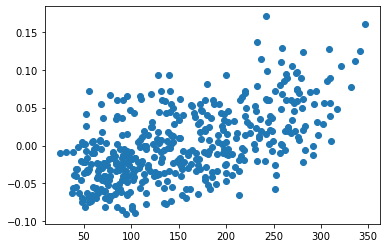

In [130]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

plt.scatter(target_df, features_df['bmi'])


In [136]:
X = features_df[['bmi']]
y = df['target']
reg = LinearRegression().fit(X, y)

In [137]:
reg.coef_

array([949.43526038])

In [138]:
reg.intercept_

152.1334841628967

In [139]:
ytrain = reg.intercept_ + reg.coef_ * X
#y = b + mx 

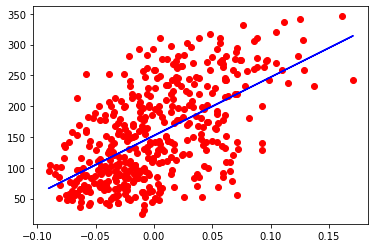

In [140]:
plt.plot(X,y,'ro',X,ytrain,'b-');

In [141]:
mean_squared_error(y, ytrain)

3890.4565854612724

In [142]:
r2_score(y, ytrain)

0.3439237602253803

[304.18307453]
152.13348416289605


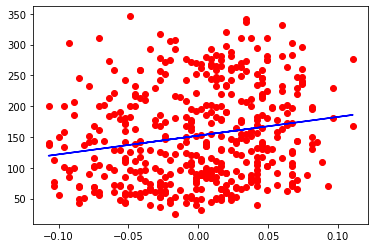

In [145]:
X = features_df[['age']]
y = df['target']
reg = LinearRegression().fit(X, y)

print(reg.coef_)

print(reg.intercept_)

ytrain = reg.intercept_ + reg.coef_ * X

plt.plot(X,y,'ro',X,ytrain,'b-');

In [146]:
print(mean_squared_error(y, ytrain))
print(r2_score(y, ytrain))

#mean squared is higher but the r squared values seem to be lower 

5720.5470172056475
0.03530218264671636
